Epoch 1/200


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 - 0s - 12ms/step - loss: 3.4142
Epoch 2/200
32/32 - 0s - 3ms/step - loss: 1.5776
Epoch 3/200
32/32 - 0s - 4ms/step - loss: 1.1555
Epoch 4/200
32/32 - 0s - 2ms/step - loss: 1.0226
Epoch 5/200
32/32 - 0s - 2ms/step - loss: 0.9690
Epoch 6/200
32/32 - 0s - 2ms/step - loss: 0.9420
Epoch 7/200
32/32 - 0s - 2ms/step - loss: 0.9257
Epoch 8/200
32/32 - 0s - 3ms/step - loss: 0.9147
Epoch 9/200
32/32 - 0s - 3ms/step - loss: 0.9065
Epoch 10/200
32/32 - 0s - 2ms/step - loss: 0.8999
Epoch 11/200
32/32 - 0s - 2ms/step - loss: 0.8943
Epoch 12/200
32/32 - 0s - 3ms/step - loss: 0.8894
Epoch 13/200
32/32 - 0s - 4ms/step - loss: 0.8851
Epoch 14/200
32/32 - 0s - 4ms/step - loss: 0.8811
Epoch 15/200
32/32 - 0s - 4ms/step - loss: 0.8775
Epoch 16/200
32/32 - 0s - 4ms/step - loss: 0.8741
Epoch 17/200
32/32 - 0s - 4ms/step - loss: 0.8710
Epoch 18/200
32/32 - 0s - 9ms/step - loss: 0.8680
Epoch 19/200
32/32 - 0s - 4ms/step - loss: 0.8652
Epoch 20/200
32/32 - 0s - 3ms/step - loss: 0.8625
Epoch 21/200
32/32 -

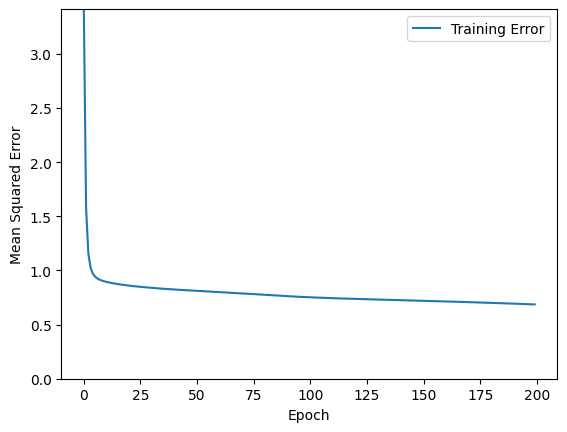

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step

Comparison between model prediction and real value:
 x1	 x2	 prediction	 real_value	 error
 0.00	 0.00	    0.6209	    1.0000	    0.3791
 1.00	 1.00	    0.2883	    1.3818	    1.0934
-2.00	 3.00	   -0.0624	   -0.2750	    0.2127
 3.00	-1.00	   -0.3669	   -1.8315	    1.4646
 4.00	 4.00	   -0.7997	   -1.4104	    0.6107


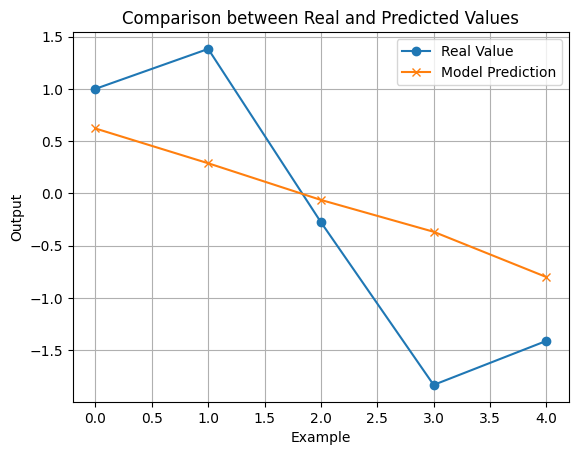

In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Set seeds for reproducibility
seed = 42
np.random.seed(seed)
tf.random.set_seed(seed)

# Generate synthetic data
n_samples = 5000
x1 = np.random.uniform(-5, 5, n_samples)
x2 = np.random.uniform(-5, 5, n_samples)
y = np.cos(x1) + np.sin(x2)

# Combine x1 and x2 into a feature matrix X
X = np.column_stack((x1, x2))

# Define the model
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu', name="hidden1_layer"))
model.add(Dense(1, name="output_layer"))

# Compile the model
learning_rate = 0.001
sgd = SGD(learning_rate=learning_rate)
model.compile(loss='mean_squared_error', optimizer=sgd)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

# Train the model
batch_size = 128
epochs = 200
history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Test set loss: {test_loss:.4f}")

def plot_history(history):
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.plot(history.epoch, history.history['loss'], label='Training Error')
    plt.legend()
    plt.ylim([0, max(1, max(history.history['loss']))])
    plt.show()

plot_history(history)

# Prediction and comparison ---

# Some example values
X_pred = np.array([
    [0, 0],
    [1, 1],
    [-2, 3],
    [3, -1],
    [4, 4]
])

# Model predictions
y_pred = model.predict(X_pred)

# Real results according to the original function
y_true = np.cos(X_pred[:, 0]) + np.sin(X_pred[:, 1])

# Show comparison
print("\nComparison between model prediction and real value:")
print(" x1\t x2\t prediction\t real_value\t error")
for (x1_val, x2_val, yp, yt) in zip(X_pred[:, 0], X_pred[:, 1], y_pred.flatten(), y_true):
    print(f"{x1_val:5.2f}\t{x2_val:5.2f}\t{yp:10.4f}\t{yt:10.4f}\t{abs(yp - yt):10.4f}")

# Visualization of comparison
plt.figure()
plt.plot(y_true, label='Real Value', marker='o')
plt.plot(y_pred, label='Model Prediction', marker='x')
plt.title('Comparison between Real and Predicted Values')
plt.xlabel('Example')
plt.ylabel('Output')
plt.legend()
plt.grid(True)
plt.show()
